In [142]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Set
CM: [[49  1]
 [ 2 28]]
Precision 0.949438202247191
F Score 0.9491525423728815
Recall 0.9285714285714286
AUC 0.9566666666666667


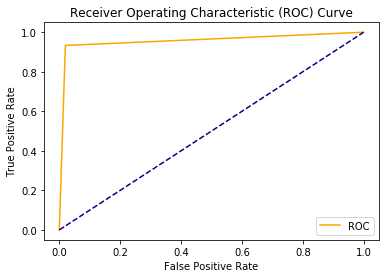

Training Set
CM: [[298   9]
 [ 13 169]]
Precision 0.949438202247191
F Score 0.9388888888888889
Recall 0.9285714285714286
AUC 0.9496277338296882


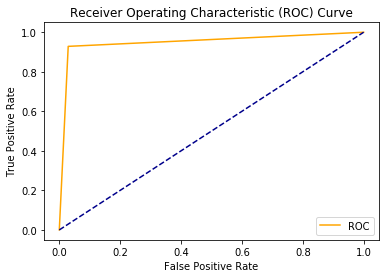

In [85]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# 1A

data_set_path = '../data/wdbc.data'

data = pd.read_table(data_set_path, sep = ',', header=None)

# replace M with 1, B with 0
data[1].replace('M',1,inplace=True)
data[1].replace('B',0,inplace=True)

# 1B

# test set

mal = data[data[1] == 1].head(30) # first 30 mal
ben = data[data[1] == 0].head(50) # first 50 ben

test = pd.concat([mal,ben])

x_test = test
y_test = x_test.pop(1)
x_test.pop(0)

# training set

train = data.drop(test.index.values)

x_train = train
y_train = x_train.pop(1)
x_train.pop(0)

# 1C(i)

# sb.pairplot(train, y_vars = list(range(2, 29)))

# 1C(ii)

logisticRegr = LogisticRegression()

# TEST SET

logisticRegr.fit(x_train, y_train)

predictions_te = logisticRegr.predict(x_test)

cm_te = metrics.confusion_matrix(y_test, predictions_te)

TN_te = cm[0][0]
FN_te = cm[1][0]
TP_te = cm[1][1]
FP_te = cm[0][1]

# Precision
P_te = TP_te/(TP_te+FP_te)
# F Score
F_te = f1_score(list(y_test), list(predictions_te), pos_label = 1)
# Recall 
R_te = TP_te/(TP_te+FN_te)

print('Test Set')
print('CM:', cm_te)
print('Precision', P_te)
print('F Score', F_te)
print('Recall', R_te)
auc_te = roc_auc_score(list(y_test), list(predictions_te))
print('AUC', auc_te)
fpr_te, tpr_te, thresholds_te = roc_curve(list(y_test), list(predictions_te))
plot_roc_curve(fpr_te, tpr_te)

# TRAIN SET

predictions_tr = logisticRegr.predict(x_train)

cm_tr = metrics.confusion_matrix(y_train, predictions_tr)

TN_tr = cm[0][0]
FN_tr = cm[1][0]
TP_tr = cm[1][1]
FP_tr = cm[0][1]

# Precision
P_tr = TP_tr/(TP_tr+FP_tr)
# F Score
F_tr = f1_score(list(y_train), list(predictions_tr), pos_label = 1)
# Recall 
R_tr = TP_tr/(TP_tr+FN_tr)

print('Training Set')
print('CM:', cm_tr)
print('Precision', P_tr)
print('F Score', F_tr)
print('Recall', R_tr)
auc_tr = roc_auc_score(list(y_train), list(predictions_tr))
print('AUC', auc_tr)

fpr_tr, tpr_tr, thresholds_tr = roc_curve(list(y_train), list(predictions_tr))
plot_roc_curve(fpr_tr, tpr_tr)

In [76]:
# 1C(iii)

model_te = sm.OLS(y_test, sm.add_constant(x_test))
fit_te = model_te.fit()
print(fit_te.summary())

pval_te = pd.DataFrame(data = round(fit_te.pvalues, 4).values, columns = ['p values'])
print(pval_test <= 0.05)

model_tr = sm.OLS(y_train, sm.add_constant(x_train))
fit_tr = model_te.fit()
print(fit_tr.summary())

pval_tr = pd.DataFrame(data = round(fit_tr.pvalues, 4).values, columns = ['p values'])
print(pval_tr <= 0.05)


                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     13.03
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.11e-14
Time:                        19:38:12   Log-Likelihood:                 32.301
No. Observations:                  80   AIC:                            -2.603
Df Residuals:                      49   BIC:                             71.24
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6896      1.280     -1.320      0.1

Only coefficients 2 and 7 have a p-value less than 0.05.

Test Set
CM: [[50  0]
 [10 20]]
Precision 0.949438202247191
F Score 0.8
Recall 0.9285714285714286
AUC 0.8333333333333333


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


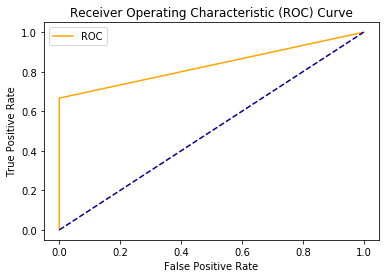

Training Set
CM: [[298   9]
 [ 45 137]]
Precision 0.949438202247191
F Score 0.8353658536585366
Recall 0.9285714285714286
AUC 0.8617156459176003


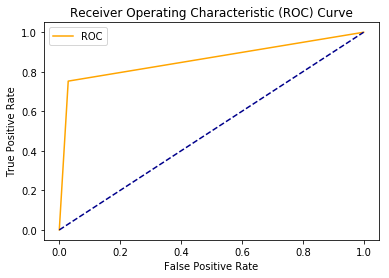

In [86]:
# 1C(iii)

print("Only coefficients 2 and 7 have a p-value less than 0.05.")
print()

x_train = x_train[[2, 7]]
x_test = x_test[[2, 7]]

# TEST SET

logisticRegr.fit(x_train, y_train)

predictions_te = logisticRegr.predict(x_test)

cm_te = metrics.confusion_matrix(y_test, predictions_te)

TN_te = cm[0][0]
FN_te = cm[1][0]
TP_te = cm[1][1]
FP_te = cm[0][1]

# Precision
P_te = TP_te/(TP_te+FP_te)
# F Score
F_te = f1_score(list(y_test), list(predictions_te), pos_label = 1)
# Recall 
R_te = TP_te/(TP_te+FN_te)

print('Test Set')
print('CM:', cm_te)
print('Precision', P_te)
print('F Score', F_te)
print('Recall', R_te)
auc_te = roc_auc_score(list(y_test), list(predictions_te))
print('AUC', auc_te)
fpr_te, tpr_te, thresholds_te = roc_curve(list(y_test), list(predictions_te))
plot_roc_curve(fpr_te, tpr_te)

# TRAIN SET

predictions_tr = logisticRegr.predict(x_train)

cm_tr = metrics.confusion_matrix(y_train, predictions_tr)

TN_tr = cm[0][0]
FN_tr = cm[1][0]
TP_tr = cm[1][1]
FP_tr = cm[0][1]

# Precision
P_tr = TP_tr/(TP_tr+FP_tr)
# F Score
F_tr = f1_score(list(y_train), list(predictions_tr), pos_label = 1)
# Recall 
R_tr = TP_tr/(TP_tr+FN_tr)

print('Training Set')
print('CM:', cm_tr)
print('Precision', P_tr)
print('F Score', F_tr)
print('Recall', R_tr)
auc_tr = roc_auc_score(list(y_train), list(predictions_tr))
print('AUC', auc_tr)

fpr_tr, tpr_tr, thresholds_tr = roc_curve(list(y_train), list(predictions_tr))
plot_roc_curve(fpr_tr, tpr_tr)

In [88]:
# 1C(iv)

print("1C(iv): Yes, the classes seem to be well separated which causes instability. There are a couple classes that seem to particularly good predictors, but the others are not comparable which is what is causing this.")

1C(iv): Yes, the classes seem to be well separated which causes instability. There are a couple classes that seem to particularly good predictors, but the others are not comparable which is what is causing this.


Test Set
CM: [[14  7]
 [ 6  3]]
Precision 0.949438202247191
F Score 0.3157894736842105
Recall 0.9285714285714286
AUC 0.5


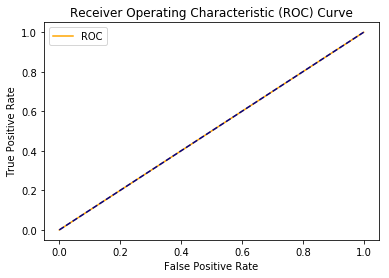

Training Set
CM: [[98 32]
 [20 18]]
Precision 0.949438202247191
F Score 0.40909090909090906
Recall 0.9285714285714286
AUC 0.6137651821862348


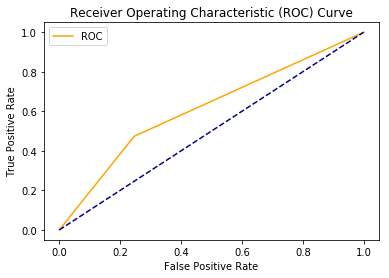

In [140]:
# 2A

data_set_path = '../data/wpbc.data'

data = pd.read_table(data_set_path, sep = ',', header=None)

# replace R with 1, N with 0
data[1].replace('R',1,inplace=True)
data[1].replace('N',0,inplace=True)

#2B

rec = data[data[1] == 1].head(37) # first 37 rec
nonrec = data[data[1] == 0].head(130) # first 130 nonrec

train = pd.concat([rec, nonrec])
train = train.append(data.iloc[196])

#2C

train_mv = train[train[34] == '?']
train = train.drop(train_mv.index.values)

mv_median = train.iloc[:,34].median()
train_mv.iloc[:,34] = mv_median

train = train.append(train_mv)
test = data.drop(train.index.values)

x_train = train
y_train = x_train.pop(1)
x_train.pop(2)
x_train.pop(0)

x_test = test
y_test = x_test.pop(1)
x_test.pop(2)
x_test.pop(0)

#2D(i)

bayes = GaussianNB()

bayes.fit(x_train, y_train)

predictions_te = bayes.predict(x_test)

cm_te = metrics.confusion_matrix(y_test, predictions_te)

TN_te = cm[0][0]
FN_te = cm[1][0]
TP_te = cm[1][1]
FP_te = cm[0][1]

# Precision
P_te = TP_te/(TP_te+FP_te)
# F Score
F_te = f1_score(list(y_test), list(predictions_te), pos_label = 1)
# Recall 
R_te = TP_te/(TP_te+FN_te)

print('Test Set')
print('CM:', cm_te)
print('Precision', P_te)
print('F Score', F_te)
print('Recall', R_te)
auc_te = roc_auc_score(list(y_test), list(predictions_te))
print('AUC', auc_te)
fpr_te, tpr_te, thresholds_te = roc_curve(list(y_test), list(predictions_te))
plot_roc_curve(fpr_te, tpr_te)

# TRAIN SET

predictions_tr = bayes.predict(x_train)

cm_tr = metrics.confusion_matrix(y_train, predictions_tr)

TN_tr = cm[0][0]
FN_tr = cm[1][0]
TP_tr = cm[1][1]
FP_tr = cm[0][1]

# Precision
P_tr = TP_tr/(TP_tr+FP_tr)
# F Score
F_tr = f1_score(list(y_train), list(predictions_tr), pos_label = 1)
# Recall 
R_tr = TP_tr/(TP_tr+FN_tr)

print('Training Set')
print('CM:', cm_tr)
print('Precision', P_tr)
print('F Score', F_tr)
print('Recall', R_tr)
auc_tr = roc_auc_score(list(y_train), list(predictions_tr))
print('AUC', auc_tr)

fpr_tr, tpr_tr, thresholds_tr = roc_curve(list(y_train), list(predictions_tr))
plot_roc_curve(fpr_tr, tpr_tr)

Test Set
CM: [[13  8]
 [ 4  5]]
Precision 0.949438202247191
F Score 0.4545454545454546
Recall 0.9285714285714286
AUC 0.5873015873015873


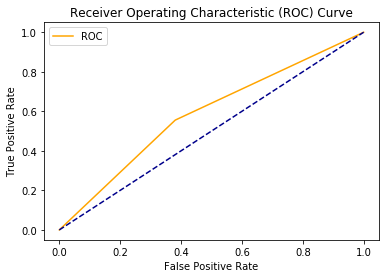

Training Set
CM: [[64 26]
 [32 58]]
Precision 0.949438202247191
F Score 0.6666666666666666
Recall 0.9285714285714286
AUC 0.6777777777777778


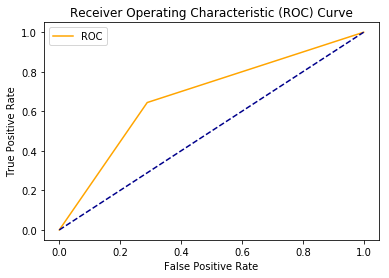

SMOTE does help. Precision, F Score, Recall, and AUC all improved.


In [149]:
# 2D(ii)

rec = data[data[1] == 1].head(37) # first 37 rec
nonrec = data[data[1] == 0].head(90) # first 90 nonrec

train = pd.concat([rec, nonrec])
train = train.append(data.iloc[196])

train_mv = train[train[34] == '?']
train = train.drop(train_mv.index.values)

mv_median = train.iloc[:,34].median()
train_mv.iloc[:,34] = mv_median

train = train.append(train_mv)
x_train = train
y_train = x_train.pop(1)
x_train.pop(2)
x_train.pop(0)

sm = SMOTE(k_neighbors = 5, sampling_strategy = {0:90, 1:90})

x_train, y_train = sm.fit_sample(x_train, y_train)

bayes = GaussianNB()

bayes.fit(x_train, y_train)

predictions_te = bayes.predict(x_test)

# TEST SET

cm_te = metrics.confusion_matrix(y_test, predictions_te)

TN_te = cm[0][0]
FN_te = cm[1][0]
TP_te = cm[1][1]
FP_te = cm[0][1]

# Precision
P_te = TP_te/(TP_te+FP_te)
# F Score
F_te = f1_score(list(y_test), list(predictions_te), pos_label = 1)
# Recall 
R_te = TP_te/(TP_te+FN_te)

print('Test Set')
print('CM:', cm_te)
print('Precision', P_te)
print('F Score', F_te)
print('Recall', R_te)
auc_te = roc_auc_score(list(y_test), list(predictions_te))
print('AUC', auc_te)
fpr_te, tpr_te, thresholds_te = roc_curve(list(y_test), list(predictions_te))
plot_roc_curve(fpr_te, tpr_te)

# TRAIN SET

predictions_tr = bayes.predict(x_train)

cm_tr = metrics.confusion_matrix(y_train, predictions_tr)

TN_tr = cm[0][0]
FN_tr = cm[1][0]
TP_tr = cm[1][1]
FP_tr = cm[0][1]

# Precision
P_tr = TP_tr/(TP_tr+FP_tr)
# F Score
F_tr = f1_score(list(y_train), list(predictions_tr), pos_label = 1)
# Recall 
R_tr = TP_tr/(TP_tr+FN_tr)

print('Training Set')
print('CM:', cm_tr)
print('Precision', P_tr)
print('F Score', F_tr)
print('Recall', R_tr)
auc_tr = roc_auc_score(list(y_train), list(predictions_tr))
print('AUC', auc_tr)

fpr_tr, tpr_tr, thresholds_tr = roc_curve(list(y_train), list(predictions_tr))
plot_roc_curve(fpr_tr, tpr_tr)

print("SMOTE does help. Precision, F Score, Recall, and AUC all improved.")